CNN using finger component rotations

In [1]:
# Seed value
seed_value = 1

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
seed_value += 1

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
seed_value += 1

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
seed_value += 1

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from utils.parseData import GetData

In [3]:
fileNames = 'comp_rot_3d'
path = "./data/"
labels, data = GetData(path=path, augment=False, loc=False, w_space=False, threeD=True)

#df = pd.DataFrame(data) # for visualising
#df

[[[ 122.989521    5.031775   32.396511]
  [ 154.947733    2.893299   48.086895]
  [ 145.477856   -8.119449   46.227878]
  ...
  [-125.367848  -72.437172  -50.852973]
  [ -96.587422  -79.76757   -67.930081]
  [ -70.781021  -70.997175  -87.361629]]

 [[ 135.335277   22.762292   47.132208]
  [ 171.382518   45.664967   57.643169]
  [-179.805451   40.565404   84.301659]
  ...
  [  83.136421   15.529929   90.343455]
  [  78.789987    5.173831   90.525847]
  [  72.386893   -4.364089  104.625646]]

 [[ 141.891296   28.615349   54.48947 ]
  [-178.385441   47.452724   69.867222]
  [-175.951196   39.809274   87.187351]
  ...
  [  82.213256   36.904574   89.425871]
  [  76.610167   22.542002   89.209393]
  [  73.08091    -3.183434  110.232384]]

 ...

 [[ 124.592251    8.038458   34.421333]
  [ 156.804631   -0.996085   52.78877 ]
  [ 147.237097  -10.483502   52.864645]
  ...
  [-100.673949  -30.500347  -72.67317 ]
  [ -88.473434  -30.455098  -71.664444]
  [  67.206452   33.679707   95.859042]]

 [

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=2, stratify=labels)

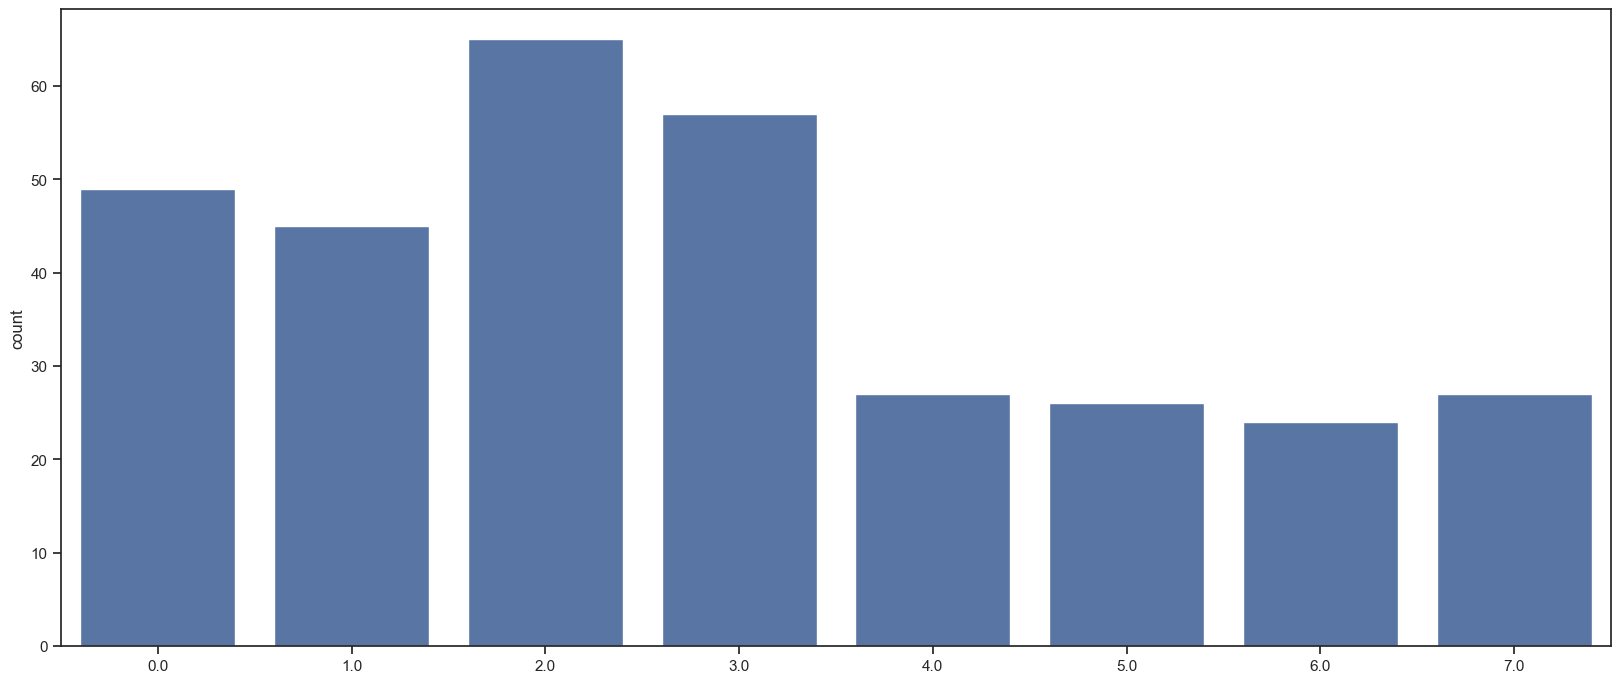

In [5]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("ticks")
sns.color_palette("hls", 8)
cat = sns.countplot(x=y_train.reshape(-1))

In [6]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (320, 22, 3)
y_train shape: (320, 1)

X_test shape: (80, 22, 3)
y_test shape: (80, 1)


Changing labels shape to categorical: 

In [7]:
y_train[0]

array([3.])

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

y_train shape: (320, 8)
y_test shape: (80, 8)


In [11]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [12]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (320, 22, 3, 1)
X_test shape: (80, 22, 3, 1)


In [13]:
class_mapping = ['thumbs_up','thumbs_down','ok','victory', 'horns', 'phone', 'one', 'point']
num_classes = 8

#2. Creating and training CNN

In [14]:
import keras
from keras import layers  
from keras import models
from keras import callbacks
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
def create_1D_model():
  model = models.Sequential()

  model.add(layers.Conv2D(32, 3, input_shape=X_train.shape[1:4], activation='relu', ))
  model.add(layers.Conv2D(16, 1, activation='relu', ))
  model.add(layers.Dropout(0.2))
  model.add(layers.MaxPooling2D(pool_size=1))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model

In [18]:
model = create_1D_model()
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy', 'Precision', 'Recall'])

In [19]:
MCP = keras.callbacks.ModelCheckpoint('./results/' + 'model_' + fileNames + '.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [20]:
history = model.fit(X_train, y_train, batch_size=32,epochs=100, validation_data=(X_test, y_test),callbacks=[MCP,ES,RLP],verbose=1)

Epoch 1/100


 1/10 [==>...........................] - ETA: 3s - loss: 15.6864 - accuracy: 0.2188 - precision: 0.2500 - recall: 0.2188
Epoch 1: val_accuracy improved from -inf to 0.88750, saving model to ./results\model_comp_rot_3d.h5
10/10 [==============================] - 1s 21ms/step - loss: 4.9709 - accuracy: 0.4594 - precision: 0.4812 - recall: 0.4406 - val_loss: 0.3406 - val_accuracy: 0.8875 - val_precision: 0.8846 - val_recall: 0.8625 - lr: 0.0100
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.4572 - accuracy: 0.8125 - precision: 0.8276 - recall: 0.7500
Epoch 2: val_accuracy did not improve from 0.88750
10/10 [==============================] - 0s 4ms/step - loss: 0.4975 - accuracy: 0.7937 - precision: 0.8328 - recall: 0.7625 - val_loss: 0.2762 - val_accuracy: 0.8250 - val_precision: 0.8354 - val_recall: 0.8250 - lr: 0.0100
Epoch 3/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.3972 - accuracy: 0.7812 - precision: 0.8621 - recall: 0.7812
E

d:\Repositories\python-workspaces\deep-learning-tests\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 0s 5ms/step - loss: 0.2117 - accuracy: 0.9281 - precision: 0.9308 - recall: 0.9250 - val_loss: 0.0816 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 0.0100
Epoch 6/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1377 - accuracy: 0.9375 - precision: 0.9375 - recall: 0.9375
Epoch 6: val_accuracy did not improve from 1.00000
10/10 [==============================] - 0s 4ms/step - loss: 0.1908 - accuracy: 0.9281 - precision: 0.9299 - recall: 0.9125 - val_loss: 0.0689 - val_accuracy: 0.9750 - val_precision: 0.9750 - val_recall: 0.9750 - lr: 0.0100
Epoch 7/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0804 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 7: val_accuracy did not improve from 1.00000
10/10 [==============================] - 0s 4ms/step - loss: 0.2214 - accuracy: 0.9344 - precision: 0.9369 - recall: 0.9281 - val_loss: 0.0625 - val_accuracy: 0.9875 - val_precision: 0.9

#3. CNN evaluation

In [21]:
model.evaluate(X_test, y_test, verbose=2)

3/3 - 0s - loss: 0.0816 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - 16ms/epoch - 5ms/step


[0.08157704770565033, 1.0, 1.0, 1.0]

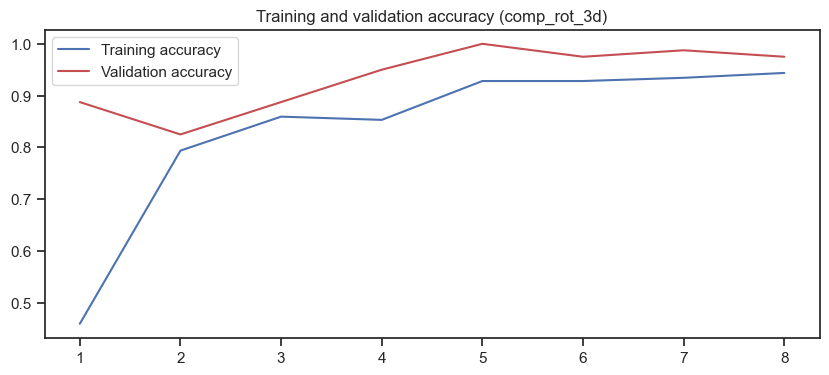

<Figure size 2000x827 with 0 Axes>

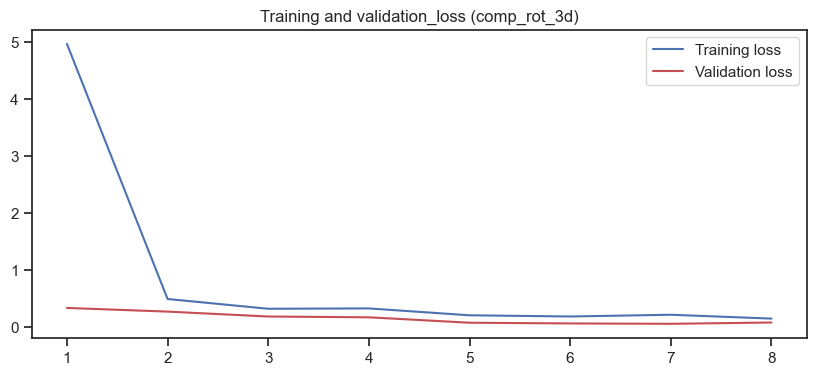

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy (' + fileNames + ')')
plt.legend() 
plt.savefig('./results/acc_' + fileNames + '.png',dpi=200)
plt.figure()

plt.figure(figsize=(10, 4))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation_loss (' + fileNames + ')')
plt.savefig('./results/loss_' + fileNames + '.png',dpi=200)
plt.legend()
plt.show()

In [23]:
predictions = np.argmax(model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

3/3 [==============================] - 0s 2ms/step


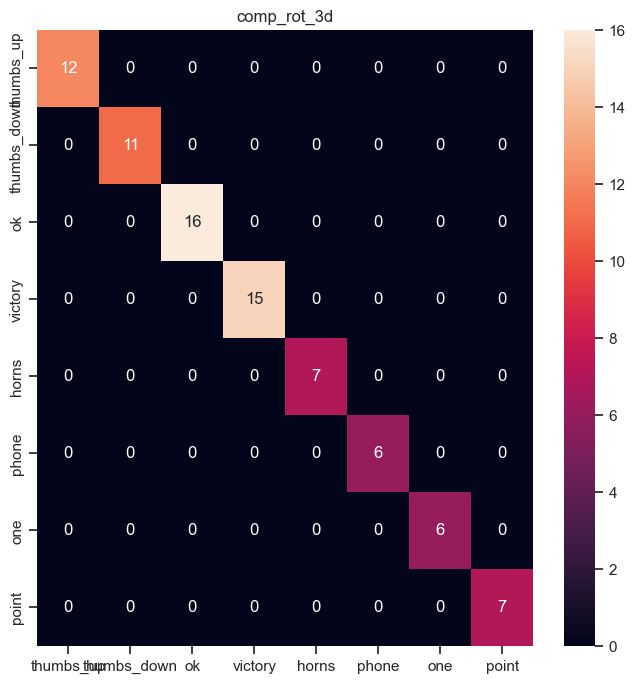

In [24]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(actual, predictions)
g = sns.heatmap(cm, annot=True, fmt='.0f')
g.set_xticklabels(class_mapping)
g.set_yticklabels(class_mapping)
plt.title(fileNames)
plt.savefig('./results/confusion_' + fileNames + '.png',dpi=200)
plt.show()

In [25]:
y_test_temp = np.argmax(y_test, axis=1)
print(classification_report(y_test_temp, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         7

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

